In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
water = pd.read_csv("dataset.csv")

In [3]:
water

,pH,Conductivity (μS/cm),Turbidity (NTU),Temperature (°C),Quality
0,7.2,700.0,4.2,28.1,1
1,7.6,820.0,4.9,31.2,1
2,6.6,550.0,0.9,17.2,0
3,6.7,556.0,0.8,16.6,0
4,7.5,760.0,1.9,17.5,0
...,...,...,...,...,...
542,7.8,920.0,9.0,27.3,1
543,7.2,550.0,7.0,24.5,1
544,7.3,660.0,10.0,22.1,1
545,7.5,730.0,11.0,25.6,1


In [4]:
water.isnull().any()

pH                      False
Conductivity (μS/cm)    False
Turbidity (NTU)         False
Temperature (°C)        False
Quality                 False
dtype: bool

In [5]:
water.shape

(547, 5)

In [6]:
water.columns

Index(['pH', 'Conductivity (μS/cm)', 'Turbidity (NTU)', 'Temperature (°C)',
       'Quality'],
      dtype='object')

In [7]:
water.dtypes

pH                      float64
Conductivity (μS/cm)    float64
Turbidity (NTU)         float64
Temperature (°C)        float64
Quality                   int64
dtype: object

In [8]:
water.head()

,pH,Conductivity (μS/cm),Turbidity (NTU),Temperature (°C),Quality
0,7.2,700.0,4.2,28.1,1
1,7.6,820.0,4.9,31.2,1
2,6.6,550.0,0.9,17.2,0
3,6.7,556.0,0.8,16.6,0
4,7.5,760.0,1.9,17.5,0


In [9]:
water.tail()

,pH,Conductivity (μS/cm),Turbidity (NTU),Temperature (°C),Quality
542,7.8,920.0,9.0,27.3,1
543,7.2,550.0,7.0,24.5,1
544,7.3,660.0,10.0,22.1,1
545,7.5,730.0,11.0,25.6,1
546,7.1,690.0,8.0,22.4,1


In [10]:
water.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,547.0,7.366033,0.584322,3.2,7.2,7.4,7.6,11.3
Conductivity (μS/cm),547.0,979.780183,846.615091,0.6,620.0,720.0,810.0,6000.0
Turbidity (NTU),547.0,8.039360,17.659026,0.1,2.2,3.5,5.0,155.0
Temperature (°C),547.0,25.558867,4.156033,14.2,22.8,25.8,28.1,50.0
Quality,547.0,0.696527,0.648503,0.0,0.0,1.0,1.0,2.0


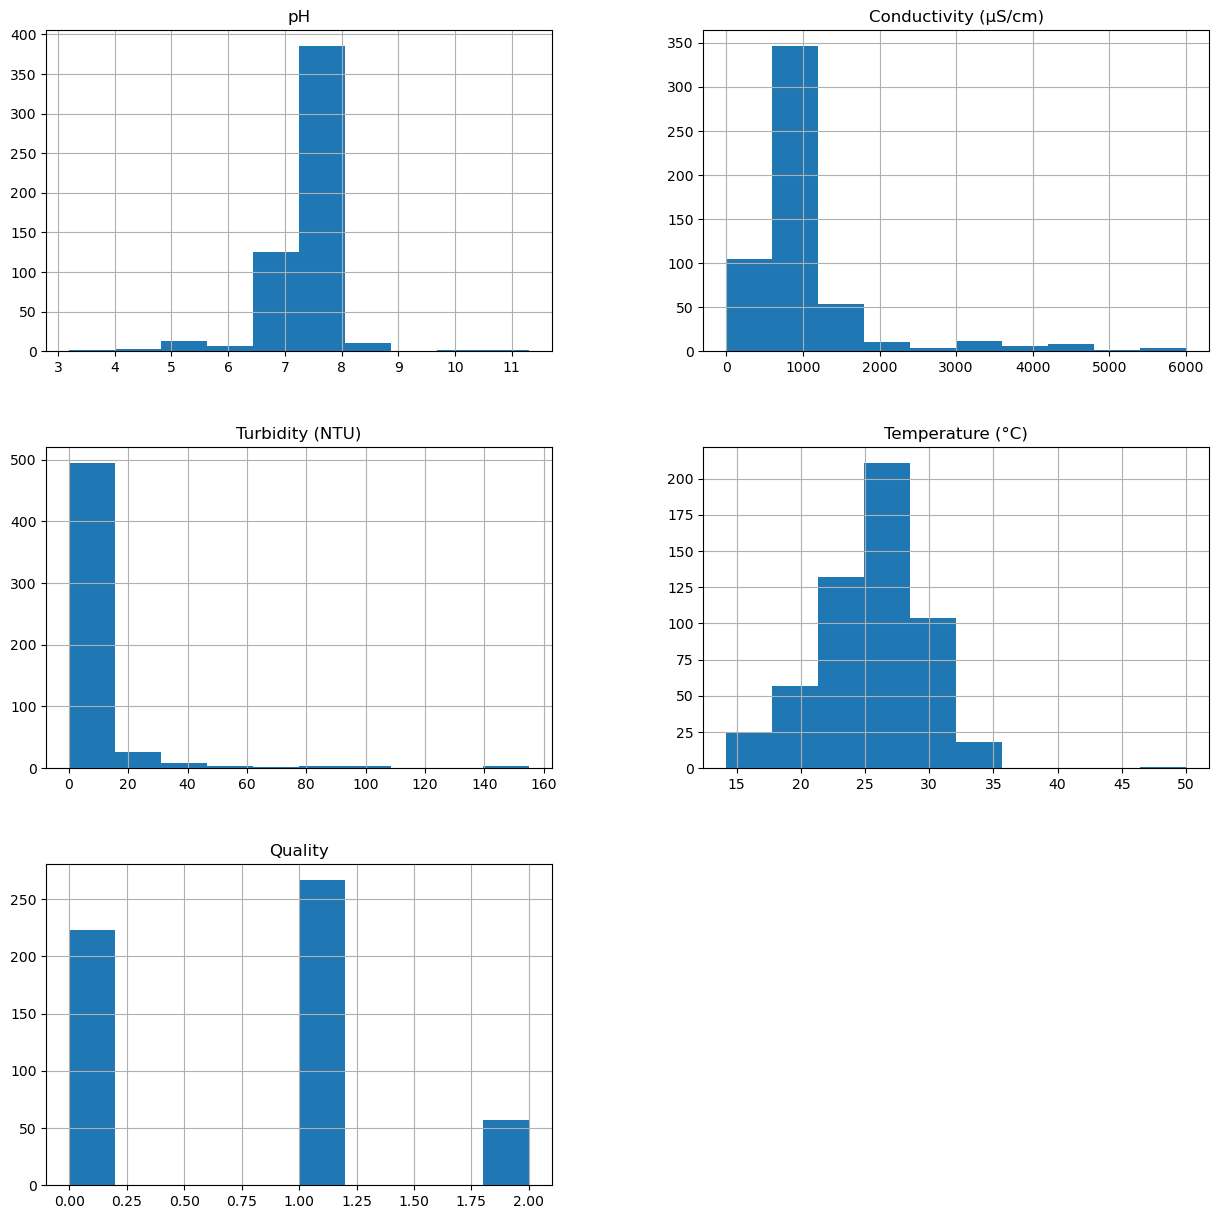

In [11]:
p = water.hist(figsize = (15,15))

Text(0, 0.5, 'Number of occurances')

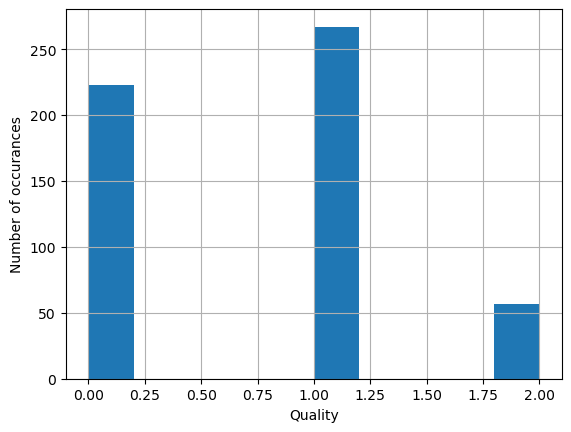

In [12]:
water["Quality"].hist()
plt.xlabel("Quality")
plt.ylabel('Number of occurances')

In [13]:
d_1 = water[water.Quality==0]
d_2 = water[water.Quality==1]
d_3 = water[water.Quality==2]

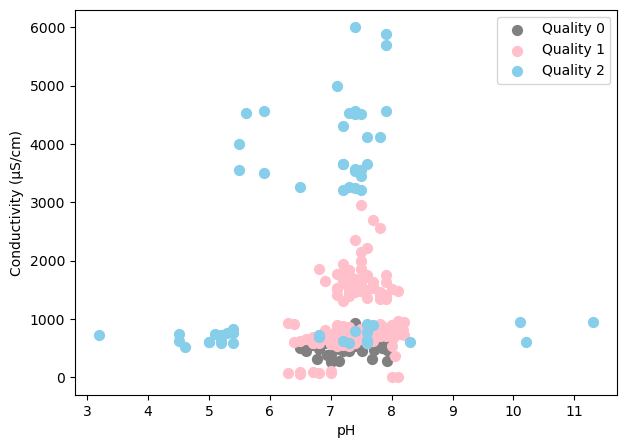

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['pH'],d_1['Conductivity (μS/cm)'],c='gray',s=50,label='Quality 0')
plt.scatter(d_2['pH'],d_2['Conductivity (μS/cm)'],c='pink',s=50,label='Quality 1')
plt.scatter(d_3['pH'],d_3['Conductivity (μS/cm)'],c='skyblue',s=50,label='Quality 2')
plt.xlabel('pH')
plt.ylabel('Conductivity (μS/cm)')
plt.legend()
plt.show()

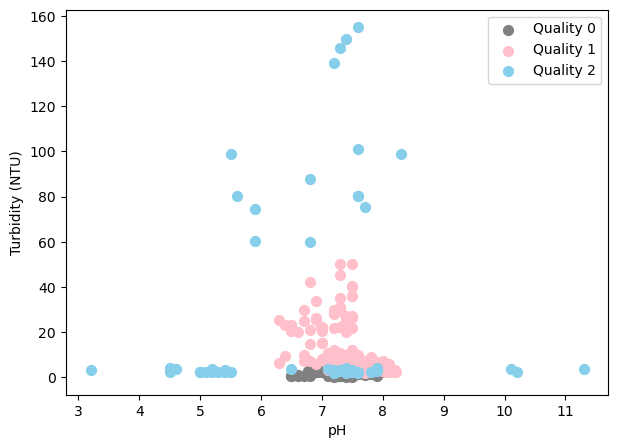

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['pH'],d_1['Turbidity (NTU)'],c='gray',s=50,label='Quality 0')
plt.scatter(d_2['pH'],d_2['Turbidity (NTU)'],c='pink',s=50,label='Quality 1')
plt.scatter(d_3['pH'],d_3['Turbidity (NTU)'],c='skyblue',s=50,label='Quality 2')
plt.xlabel('pH')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()

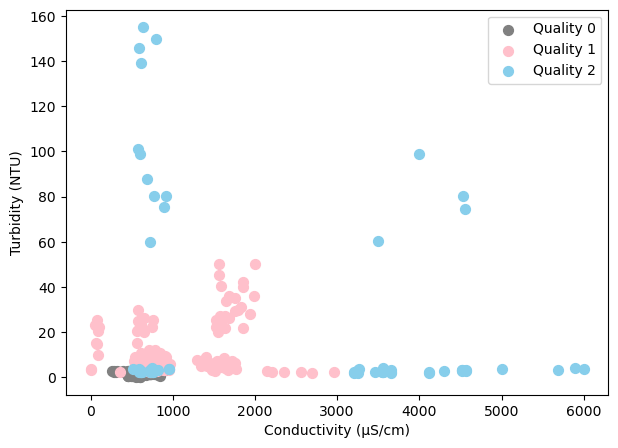

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Conductivity (μS/cm)'],d_1['Turbidity (NTU)'],c='gray',s=50,label='Quality 0')
plt.scatter(d_2['Conductivity (μS/cm)'],d_2['Turbidity (NTU)'],c='pink',s=50,label='Quality 1')
plt.scatter(d_3['Conductivity (μS/cm)'],d_3['Turbidity (NTU)'],c='skyblue',s=50,label='Quality 2')
plt.xlabel('Conductivity (μS/cm)')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()

In [17]:
X = water.drop('Quality', axis=1)
y = water['Quality']

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#transform the dataset
X, y = oversample.fit_resample(X,y)

In [19]:
X

,pH,Conductivity (μS/cm),Turbidity (NTU),Temperature (°C)
0,7.200000,700.000000,4.200000,28.100000
1,7.600000,820.000000,4.900000,31.200000
2,6.600000,550.000000,0.900000,17.200000
3,6.700000,556.000000,0.800000,16.600000
4,7.500000,760.000000,1.900000,17.500000
...,...,...,...,...
796,6.586770,3501.204885,2.336984,21.207258
797,7.146460,628.298629,132.176386,23.210172
798,7.024071,767.382141,59.947820,24.558680
799,8.180676,602.169530,103.339060,29.521340


In [20]:
y

0      1
1      1
2      0
3      0
4      0
      ..
796    2
797    2
798    2
799    2
800    2
Name: Quality, Length: 801, dtype: int64

<Axes: >

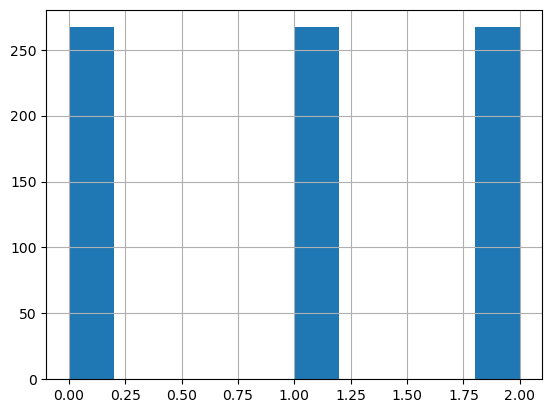

In [21]:
y.hist()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
clf1 = KNeighborsClassifier()

In [26]:
clf1.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
clf1.score(x_test,y_test)

0.8385093167701864

In [28]:
y_preds = clf1.predict(x_test)
y_preds

array([0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0,
       2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 0, 2, 1, 2], dtype=int64)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        53
           1       0.82      0.84      0.83        55
           2       0.92      0.87      0.89        53

    accuracy                           0.84       161
   macro avg       0.84      0.84      0.84       161
weighted avg       0.84      0.84      0.84       161



In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf2 = DecisionTreeClassifier()

In [32]:
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
clf2.score(x_test,y_test)

0.968944099378882

In [34]:
y_preds = clf2.predict(x_test)
y_preds

array([0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0,
       2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0,
       0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 0, 0, 2, 1, 2], dtype=int64)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf3 = RandomForestClassifier()

In [37]:
clf3.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
clf3.score(x_test,y_test)

0.9875776397515528

In [39]:
y_preds = clf3.predict(x_test)
y_preds

array([2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0,
       1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 2], dtype=int64)

In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.98      0.99        52
           2       1.00      0.98      0.99        56

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [41]:
from sklearn.svm import LinearSVC

In [42]:
clf4 = LinearSVC()

In [43]:
clf4.fit(x_train,y_train)

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [44]:
clf4.score(x_test,y_test)

0.4720496894409938

In [45]:
y_preds = clf4.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 2], dtype=int64)

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42        53
           1       0.47      0.92      0.62        52
           2       1.00      0.11      0.19        56

    accuracy                           0.47       161
   macro avg       0.63      0.48      0.41       161
weighted avg       0.64      0.47      0.41       161



In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
clf5=AdaBoostClassifier()

In [49]:
clf5.fit(x_train,y_train)

AdaBoostClassifier()

In [50]:
clf5.score(x_test,y_test)

0.7080745341614907

In [51]:
y_preds = clf5.predict(x_test)
y_preds

array([2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 1], dtype=int64)

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.62      0.29      0.39        52
           2       0.55      0.82      0.66        56

    accuracy                           0.71       161
   macro avg       0.72      0.70      0.68       161
weighted avg       0.72      0.71      0.68       161



In [53]:
from sklearn.linear_model import SGDClassifier

In [54]:
clf6= SGDClassifier()

In [55]:
clf6.fit(x_train,y_train)

SGDClassifier()

In [56]:
clf6.score(x_test,y_test)

0.484472049689441

In [57]:
y_preds = clf6.predict(x_test)
y_preds

array([2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.08      0.14        53
           1       0.36      0.73      0.48        52
           2       0.73      0.64      0.69        56

    accuracy                           0.48       161
   macro avg       0.63      0.48      0.43       161
weighted avg       0.63      0.48      0.44       161

